<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT19/blob/tobzed/Lab-4/tedwards_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 4: Approximation**
**Tobias Edwards**

# **Abstract**

This lab focused on various methods to approximate functions and integrals of functions. The main methods of this lab were the Gassian quadrature method for integral approximation, and the $L_2$-projection to piecewise linear functions. I did not do hte bonus problems.

#**About the code**

The following code is authored by Tobias Edwards for the fourth lab in course DD2363  Methods in Scientific Computing.



# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [0]:
# Load neccessary modules.
from google.colab import files

import numpy as np
import unittest
from matplotlib import pyplot as plt
from math import *

# **Introduction**

The Gaussian quadrature method says that, given $n$ points $(X_0,Y_0),...,(X_{n-1},Y_{n-1})$ from a function $f$, the method can give an exact integral for a polynomial approximation (interpolation) of $f$ with highest degree $2n-1$. 

The $L_2$-projection to piecewise linear functions does not interpolate the given nodes. Instead the function $f$ to approximate is projected to the space of piecewise linear functions over a mesh $I$ of $n-1$ intervals $I_0=[X_0,X_1]...,[I_{n-1}=X_{n-1},X_n]$. In this space we can express each linear function as a linear combination of linear basis functions $\{\phi\}_{i=0}^n$. In particular we want to use a nodal basis such that each basis function $\phi_i$is 1 for a corresponding $x_i$ and 0 $\forall j \neq i$.  The goal is then to find the coefficients $a_i$ that minimise the residual $|Pf-f|$. It can be shown that this results in solving the $Mx = b$ of size $n+1$. The deriviation of the mass matrix elements and the load vector $b$ can be found in the lecture notes. 



# **Results**

## One point Gaussian quadrature

This method approximates the integral of a function $f$ over an interval $[a,b]$. We use a single midpoint $x_0 = \frac{a+b}{2}$ which means that our interpolated function is linear.

In [0]:
def one_point_gaussian_quad(f, a=0, b=1):
    return (b-a)*f((a+b)/2.)

##L2 projection to pw linear approximation over mesh in 1D

Here we contruct the mass matrix $M$ and the load vector $b$, finally solving the equation. The solution contains our approximate values for $f(x_i)$. As stated in the lectuer notes, the derivation of the elements of $M$ show that is is more efficient to iterate over the intervals of the mesh than to iterate over each element as elements of larger index depend on elements of smaller index. 

In [0]:
def matrix_assembly(x_pts):
    n = x_pts.size-1
    M = np.zeros((n+1,n+1))
    # rather than iterating over each element of M
    # iterate over each interval of the mesh
    for i in range(n):
        h_i = x_pts[i+1] - x_pts[i]
        M[i,i] += h_i/3.
        M[i,i+1] = h_i/6.
        M[i+1,i] = h_i/6.
        M[i+1,i+1] += h_i/3.
    return M

def load_vector_assembly(f,x_pts):
    n = x_pts.size-1
    b = np.zeros((n+1,1))
    for i in range(n):
        h_i = x_pts[i+1]-x_pts[i]
        b[i] += f(x_pts[i])*h_i/2.
        b[i+1] += f(x_pts[i+1])*h_i/2.
    return b

def L2_projection_pw_linear_approx_1D(f,x_pts):
    M = matrix_assembly(x_pts)
    b = load_vector_assembly(f,x_pts)
    return np.linalg.solve(M,b)


## Tests

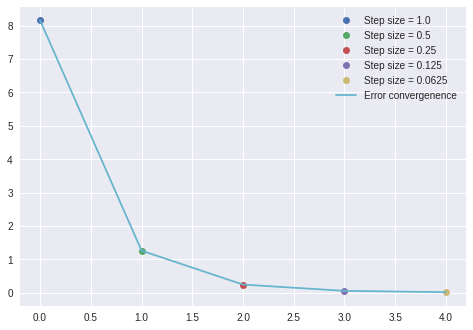

./usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Please use assertEqual instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Please use assertEqual instead.
  # This is added back by InteractiveShellApp.init_path()
.
----------------------------------------------------------------------
Ran 2 tests in 0.273s

OK


In [9]:
class Lab4FunctionsTest(unittest.TestCase):

    def test_one_point_gaussian_quad(self):
        f1 = lambda x: x**2
        res = one_point_gaussian_quad(f1)
        #on interval [0,1] exact integral is 1/4 for x^2
        self.assertEquals(res,0.25)
        f2 = lambda x : 3*x-1
        res = one_point_gaussian_quad(f2)
        #for a linear function f the integral is exact
        self.assertEquals(res,0.5)

    def test_L2_projection_pw_linear_1D(self):
        f1 = lambda x: sin(x)*3
        steps = np.array([1.,0.5,0.25,0.125,0.0625])
        errors = np.zeros(steps.size)
        for step in range(steps.size):
            x_pts = np.arange(0,11,steps[step])
            l2_res = L2_projection_pw_linear_approx_1D(f1,x_pts)
            lst_sq_res = sum([(f1(x_pts[i])-l2_res[i])**2 for i in range(x_pts.size)])
            errors[step] = lst_sq_res
            plt.plot(step,lst_sq_res, 'o',label="Step size = "+str(steps[step]))
        plt.plot(np.arange(0,steps.size),errors, label='Error convergenence')
        plt.legend()
        plt.show()

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

# Discussion

The theory for this lab was quite challenging. I had a hard time following the derivation for the elements of of the assembly matrix despite understanding roughly what was being achieved.  

  ## Sources
  
  1. Introduction to Scientific Computing by Johan Hoffman
  
  2. The Finite Element Method: Theory, Implementation, and Applications, Chapter 1: Piecewise Polynomial Approximation in 1D
  Authors: Larson, Mats G., Bengzon, Fredrik
